In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
 
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
tree_company_data = pd.read_csv('Company_Data.csv')
tree_company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
tree_company_data.loc[tree_company_data['Sales']>=7,'sales'] = 'High'
tree_company_data.loc[tree_company_data['Sales']<7,'sales'] = 'Low'

In [5]:
tree_company_data.drop('Sales',axis = 1, inplace=True)

In [6]:
tree_company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [7]:
tree_company_data.describe(include='all')

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400,400
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes,High
freq,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258,216
mean,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN,NaN
std,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN,NaN
min,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN,NaN
25%,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN,NaN
50%,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN,NaN
75%,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN,NaN


In [8]:
tree_company_data.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
sales          object
dtype: object

In [10]:
label_encoder = preprocessing.LabelEncoder()
tree_company_data['ShelveLoc']= label_encoder.fit_transform(tree_company_data['ShelveLoc'])

In [11]:
tree_company_data['Urban']= label_encoder.fit_transform(tree_company_data['Urban'])

In [12]:
tree_company_data['US']= label_encoder.fit_transform(tree_company_data['US'])

In [13]:
tree_company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,High
4,141,64,3,340,128,0,38,13,1,0,Low


In [14]:
X = tree_company_data.iloc[:,:10]
Y = tree_company_data[['sales']]

In [15]:
Y

,sales
0,High
1,High
2,High
3,High
4,Low
...,...
395,High
396,Low
397,High
398,Low


In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=10)

In [17]:
X_train.shape,Y_train.shape

((320, 10), (320, 1))

In [18]:
X_test.shape,Y_test.shape

((80, 10), (80, 1))

In [19]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
303,133,52,16,290,99,2,43,11,1,1
349,134,27,18,467,96,2,49,14,0,1
149,121,120,13,140,87,2,56,11,1,1
100,113,69,11,94,106,2,76,12,0,1
175,115,89,0,38,122,2,25,12,1,0
...,...,...,...,...,...,...,...,...,...,...
369,135,100,22,463,122,2,36,14,1,1
320,136,70,12,171,152,2,44,18,1,1
15,149,95,5,400,144,2,76,18,0,0
125,89,78,0,181,49,2,43,15,0,0


In [20]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
Y_train_pred = model.predict(X_train)

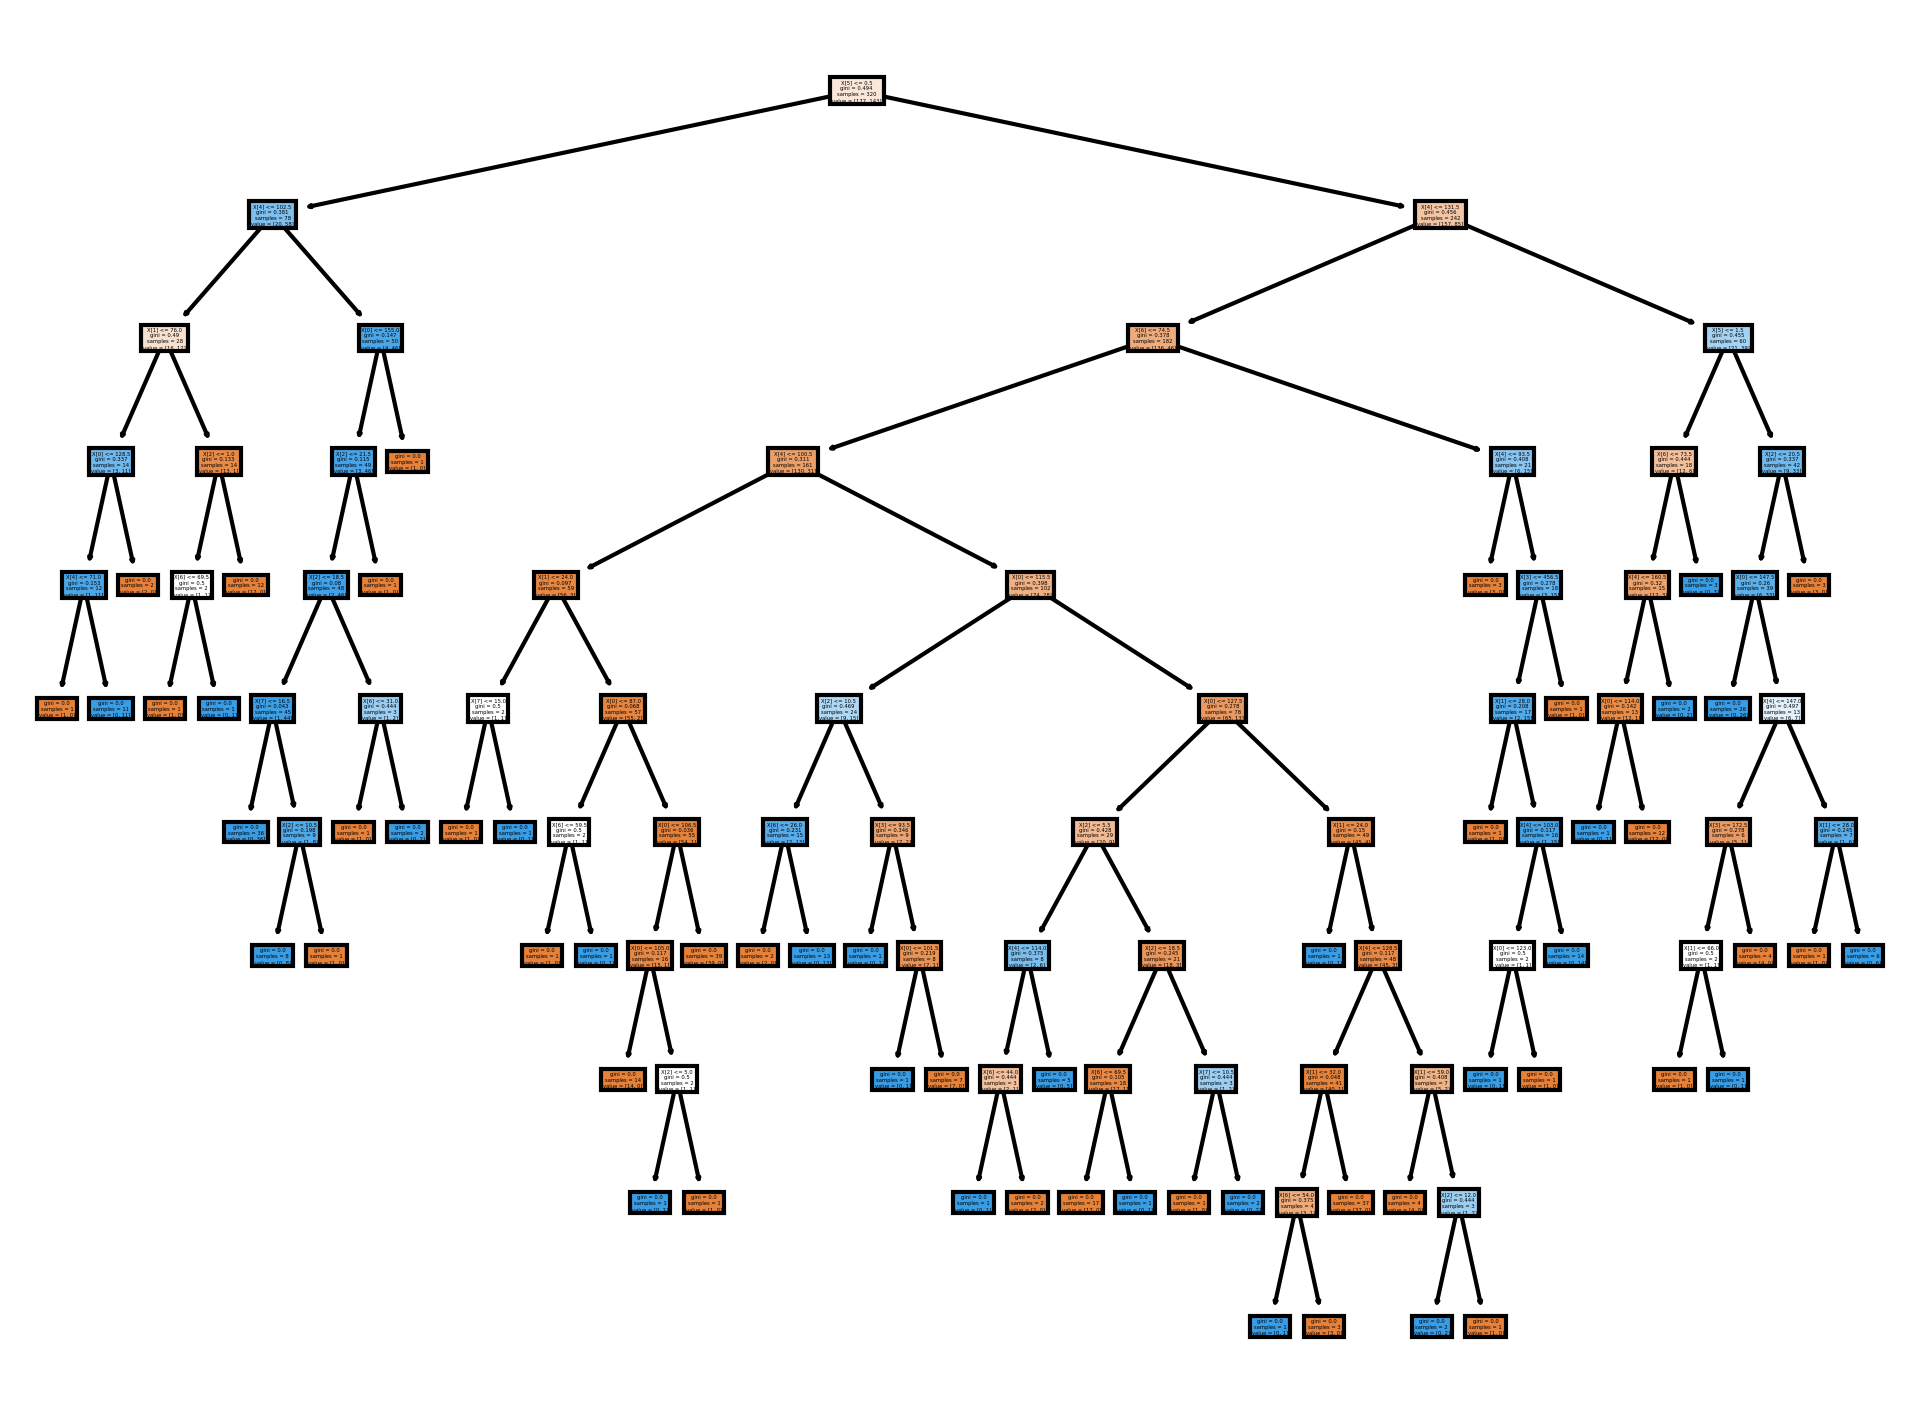

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,6), dpi=300)
tree.plot_tree(model,filled=True);

In [24]:
print('Accuracy score:',accuracy_score(Y_train,Y_train_pred))

Accuracy score: 1.0


In [25]:
print('Confusion Matrix:\n ',confusion_matrix(Y_train,Y_train_pred))

Confusion Matrix:
  [[177   0]
 [  0 143]]


In [26]:
Y_test_pred = model.predict(X_test)

In [27]:
print('Accuracy score:', accuracy_score(Y_test,Y_test_pred))

Accuracy score: 0.675


In [28]:
print('Confusion Matrix \n', confusion_matrix(Y_test,Y_test_pred))

Confusion Matrix 
 [[25 14]
 [12 29]]


### High training accuracy and low testing accuracy indicates that the model is overfitting.

In [29]:
#Applying ensemple technique to overcome overfitting
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [30]:
Y_train_pred_gbc = gbc.predict(X_train)
print('Accuracy score:',accuracy_score(Y_train,Y_train_pred_gbc))

Accuracy score: 0.99375


In [31]:
print('Confusion Matrix\n', confusion_matrix(Y_train,Y_train_pred_gbc))

Confusion Matrix
 [[176   1]
 [  1 142]]


In [33]:
Y_test_pred_gbc = gbc.predict(X_test)

In [34]:
print('Accuracy score:',accuracy_score(Y_test,Y_test_pred_gbc))

Accuracy score: 0.8125


In [35]:
print('Confusion Matrix :\n', confusion_matrix(Y_test,Y_test_pred_gbc))

Confusion Matrix :
 [[32  7]
 [ 8 33]]


In [36]:
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)

AdaBoostClassifier()

In [37]:
Y_train_pred_abc = abc.predict(X_train)
print('Accuracy score:', accuracy_score(Y_train,Y_train_pred_abc))

Accuracy score: 0.953125


In [38]:
print('COnfusion Matrix :\n', confusion_matrix(Y_train,Y_train_pred_abc))

COnfusion Matrix :
 [[169   8]
 [  7 136]]


In [39]:
Y_test_pred_abc = abc.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test,Y_test_pred_abc))

Accuracy score: 0.825


In [42]:
print('COnfusion Matrix :\n', confusion_matrix(Y_test,Y_test_pred_abc))

COnfusion Matrix :
 [[33  6]
 [ 8 33]]


### Adaboost showing the best accuracy than that of Gradient boosting